In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
data = np.loadtxt('ex2data1.txt', delimiter=',')
X = data[:, :2]
Y = data[:, 2]
Y = Y.reshape(100, 1)

m = len(Y)
X_padded = np.hstack((np.ones((m, 1)), X))


(100, 1)


In [57]:
def plotData(X, Y):
    m = len(Y)
    for i in range(m):
        if Y[i] == 0:
            plt.plot(X[i, 0], X[i, 1], 'bo', label='line 1', linewidth=2)
        else :
            plt.plot(X[i, 0], X[i, 1], 'go', label='line 2', linewidth=2)

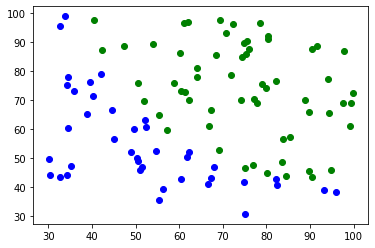

In [58]:
plotData(X, Y)

In [59]:
def sigmoid(x):
    h_x = 1/(1+np.exp(-x))
    return h_x
    

In [60]:
def computeCost(theta, X, Y):
    m = np.size(Y)
    J = 0;
    J = (1/m) * np.sum((-Y * np.log(sigmoid(np.dot(X, theta))) - (1 - Y) * np.log(1 - sigmoid(np.dot(X, theta)))))
    return J

In [61]:
def gradientDescent(X, Y, theta, alpha, num_iters):
    m = np.size(Y)
    for iter in range(num_iters):
        theta = theta - (alpha/m) * np.dot(X.T, (sigmoid(np.dot(X,theta)) - Y))
    return theta

In [65]:
def plotDecisionBoundary(theta, X, Y):
    plotData(X, Y)

    plot_x = [min(X[:,0])-2,  max(X[:,0])+2]
    plot_y =[(-1/theta[2]) *(theta[1]*plot_x[0] + theta[0]), (-1/theta[2]) *(theta[1]*plot_x[1] + theta[0])]
    plt.plot(plot_x, plot_y)
    plt.plot(30, 100, 30, 100)
    
    plt.show()


In [66]:
def predict(theta, X):
    m = len(theta)
    p = np.zeros((m, 1));
    p = sigmoid(np.dot( X, theta)) >= 0.5
    return p

0.6931471805599453
[[-41.02122367]
 [  0.33647107]
 [  0.30745426]]


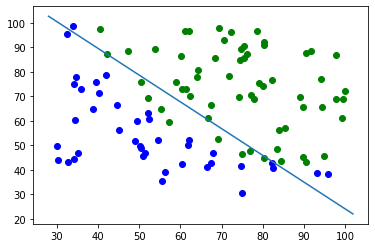

Accuracy:  88.0


In [67]:
theta = np.zeros([3,1])

num_iters = 65000
alpha = 0.01

J = computeCost(theta, X_padded, Y)

theta = gradientDescent(X_padded, Y, theta, alpha, num_iters)

print(J)
print(theta)

plotDecisionBoundary(theta, X, Y)

p = predict(theta, X_padded)

print("Accuracy: ", np.mean((p == Y)) * 100)
